In [18]:
#Preprocessing
#Part 3.1
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_excel('GooglePlaystore.xlsx')
print(df.head())
for ind in df.index:
    if df['Reviews'][ind] == '3.0M':
        print('hit')
        df.drop(ind, axis =0, inplace= True)


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres         Last Updated         Current Ver  \
0               Art & Design  2018-01-07 00:00:00               1.0.0   
1  Art & Design;Pr

In [19]:
#Preprocessing
#Part 3.2
df = df.replace("Varies with device", np.nan).dropna(axis=0, how='any')



In [20]:
#Preprocessing
#Part 3.3

import re

print(df['Android Ver'])
df['Android Ver'] = df['Android Ver'].str.extract('(\d+\.\d+)', expand= False)
print(df['Android Ver'])

0        4.0.3 and up
1        4.0.3 and up
2        4.0.3 and up
4          4.4 and up
5          2.3 and up
             ...     
10832      2.1 and up
10833      2.2 and up
10834      4.1 and up
10836      4.1 and up
10837      4.1 and up
Name: Android Ver, Length: 7637, dtype: object
0        4.0
1        4.0
2        4.0
4        4.4
5        2.3
        ... 
10832    2.1
10833    2.2
10834    4.1
10836    4.1
10837    4.1
Name: Android Ver, Length: 7637, dtype: object


In [21]:
#Preprocessing
#Part 3.4

df['Installs'] = df['Installs'].str.replace("+", "")
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].astype(float)
df = df[df.notnull()]




/var/folders/tf/6k8gnmz13939wxr24vs_1jc40000gn/T/ipykernel_63779/4204115868.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace("+", "")


In [22]:
#Preprocessing
#Part 3.5 and 3.6

avgInstallsByCategory = df.groupby('Category')['Installs'].mean().round(2)

df['Rating'][df['Reviews'] < 100][df['Installs'] < 50000].dropna(inplace = True)

for ind in df.index:
    if np.isnan(df['Installs'][ind]):
        df.at[ind, 'Installs'] = avgInstallsByCategory[df['Category'][ind]]

print(df['Size'])

for ind in df.index:
    if df['Size'][ind].endswith("M"):
        df.at[ind, 'Size'] = float(df['Size'][ind][:-1]) * 10 ** 6
    elif df['Size'][ind].endswith("k"):
        
        df.at[ind, 'Size'] = float(df['Size'][ind][:-1]) * 10 ** 3





print(df['Size'])


0         19M
1         14M
2        8.7M
4        2.8M
5        5.6M
         ... 
10832    582k
10833    619k
10834    2.6M
10836     53M
10837    3.6M
Name: Size, Length: 7637, dtype: object
0        19000000.0
1        14000000.0
2         8700000.0
4         2800000.0
5         5600000.0
            ...    
10832      582000.0
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
Name: Size, Length: 7637, dtype: object


In [23]:
#Part 3.1: Analysis
print(df.groupby('Category').describe())

                     Rating                                                    \
                      count      mean       std  min    25%   50%    75%  max   
Category                                                                        
ART_AND_DESIGN         57.0  4.378947  0.337394  3.4  4.100  4.40  4.700  5.0   
AUTO_AND_VEHICLES      62.0  4.146774  0.569935  2.1  3.900  4.25  4.500  4.9   
BEAUTY                 37.0  4.291892  0.370719  3.1  4.000  4.30  4.600  4.9   
BOOKS_AND_REFERENCE   144.0  4.320139  0.457812  2.7  4.100  4.40  4.625  5.0   
BUSINESS              245.0  4.119184  0.663942  1.0  3.800  4.30  4.500  5.0   
COMICS                 48.0  4.154167  0.556187  2.8  3.775  4.40  4.600  5.0   
COMMUNICATION         209.0  4.100957  0.503831  1.0  3.900  4.20  4.400  5.0   
DATING                173.0  3.957803  0.666132  1.0  3.600  4.10  4.400  5.0   
EDUCATION             109.0  4.392661  0.255570  3.5  4.300  4.40  4.600  4.9   
ENTERTAINMENT          86.0 

In [24]:
#Part 3.2: Analysis
def extract(column_name):
    df_to_return = pd.DataFrame(data=None, columns = ['Category', 'App', column_name])
    list = ['Category', 'App', column_name]
    
    for cat in categories:
        toAppend = free_df[free_df['Category'] == cat][list].nlargest(3, column_name)
        df_to_return = df_to_return.append(toAppend, ignore_index = True)
    return df_to_return


free_df = df[df['Type'] == 'Free']
categories = free_df['Category'].unique()
ratingDF = extract('Rating')
print(ratingDF)
installsDF = extract('Installs')
print(installsDF)
reviewsDF = extract('Reviews')
print(reviewsDF)
    

               Category                                                App  \
0        ART_AND_DESIGN            Spring flowers theme couleurs d t space   
1        ART_AND_DESIGN                         Harley Quinn wallpapers HD   
2        ART_AND_DESIGN                                  Cardi B Wallpaper   
3     AUTO_AND_VEHICLES  Tickets SDA 2018 and Exam from the State Traff...   
4     AUTO_AND_VEHICLES                     CDL Practice Test 2018 Edition   
..                  ...                                                ...   
94   NEWS_AND_MAGAZINES                                            BI News   
95   NEWS_AND_MAGAZINES                      Startupticker.ch News, Events   
96  MAPS_AND_NAVIGATION                            Tour BD (Bahir Dar Map)   
97  MAPS_AND_NAVIGATION                       GPS Speedometer and Odometer   
98  MAPS_AND_NAVIGATION                               Sygic Car Navigation   

    Rating  
0      5.0  
1      4.8  
2      4.8  
3      4.9 

/var/folders/tf/6k8gnmz13939wxr24vs_1jc40000gn/T/ipykernel_63779/3286281241.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_return = df_to_return.append(toAppend, ignore_index = True)
/var/folders/tf/6k8gnmz13939wxr24vs_1jc40000gn/T/ipykernel_63779/3286281241.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_return = df_to_return.append(toAppend, ignore_index = True)
/var/folders/tf/6k8gnmz13939wxr24vs_1jc40000gn/T/ipykernel_63779/3286281241.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_return = df_to_return.append(toAppend, ignore_index = True)
/var/folders/tf/6k8gnmz13939wxr24vs_1jc40000gn/T/ipykernel_63779/3286281241.py:8: FutureWarning: The frame.append method is deprecated and will be remo

In [25]:
#Part 3.3

paid_df = df[df['Type'] != 'Free']
print(paid_df['Price'].mean())
print(paid_df['Price'].max())
print(paid_df['Price'].min())

15.199492119089317
400.0
0.99


0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
4          Art & Design;Creativity
5                     Art & Design
                   ...            
10832                      Weather
10833            Books & Reference
10834                    Education
10836                    Education
10837                    Education
Name: Genres, Length: 7637, dtype: object


<AxesSubplot: ylabel='App'>

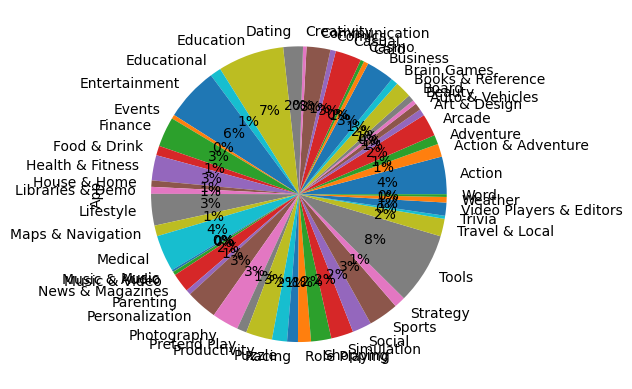

In [26]:
#Part 3.1: Visualization

print(df['Genres'])
for ind in df.index:
    if df['Genres'][ind].find(';') != -1:
        lis = df['Genres'][ind].split(';')
        df.at[ind, 'Genres'] = lis
df = df.explode('Genres')

genresCount = df.groupby('Genres')['App'].count()
genresCount.plot(kind = 'pie', y = 'Percentage of each Genre', autopct = '%1.0f%%')




<AxesSubplot: xlabel='Category', ylabel='Rating'>

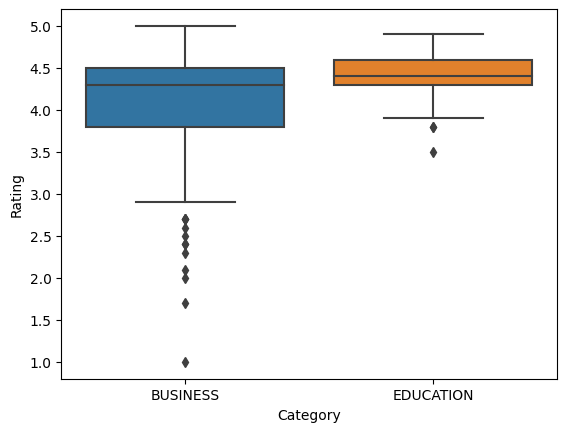

In [27]:
#Part 3.2: Visualization

boxPlotDf = df.loc[df['Category'].isin(['BUSINESS', 'EDUCATION'])]
sns.boxplot(x='Category', y='Rating', data=boxPlotDf)
